In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

In [3]:
base_directory = '/content/gdrive/MyDrive/Semester 5/Kecerdasan Buatan/Dataset-Jeruk-nipis-dan-kemangi_241_284-main'
dataset_directory = os.path.join(base_directory, 'Dataset')
train_directory = os.path.join(base_directory, 'Train')
val_directory = os.path.join(base_directory, 'Validation')

kemangi_directory = os.path.join(dataset_directory, 'Daun Kemangi/')
jeruk_nipis_directory = os.path.join(dataset_directory, 'Daun Jeruk/')

In [4]:
train_kemangi = os.path.join(train_directory, 'Daun Kemangi/')
train_jeruk_nipis = os.path.join(train_directory, 'Daun Jeruk/')

val_kemangi = os.path.join(val_directory, 'Daun Kemangi/')
val_jeruk_nipis = os.path.join(val_directory, 'Daun Jeruk/')

In [5]:
jeruk_fnames = os.listdir(train_jeruk_nipis)
print(jeruk_fnames[:10])

kemangi_fnames = os.listdir(train_kemangi)
kemangi_fnames.sort()
print(kemangi_fnames[:10])

['0008.jpg', '0005.jpg', '0029.jpg', '0038.jpg', '0028.jpg', '0013.jpg', '0017.jpg', '0021.jpg', '0019.jpg', '0039.jpg']
['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg', '0007.jpg', '0008.jpg', '0009.jpg', '0010.jpg', '0012.jpg']


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

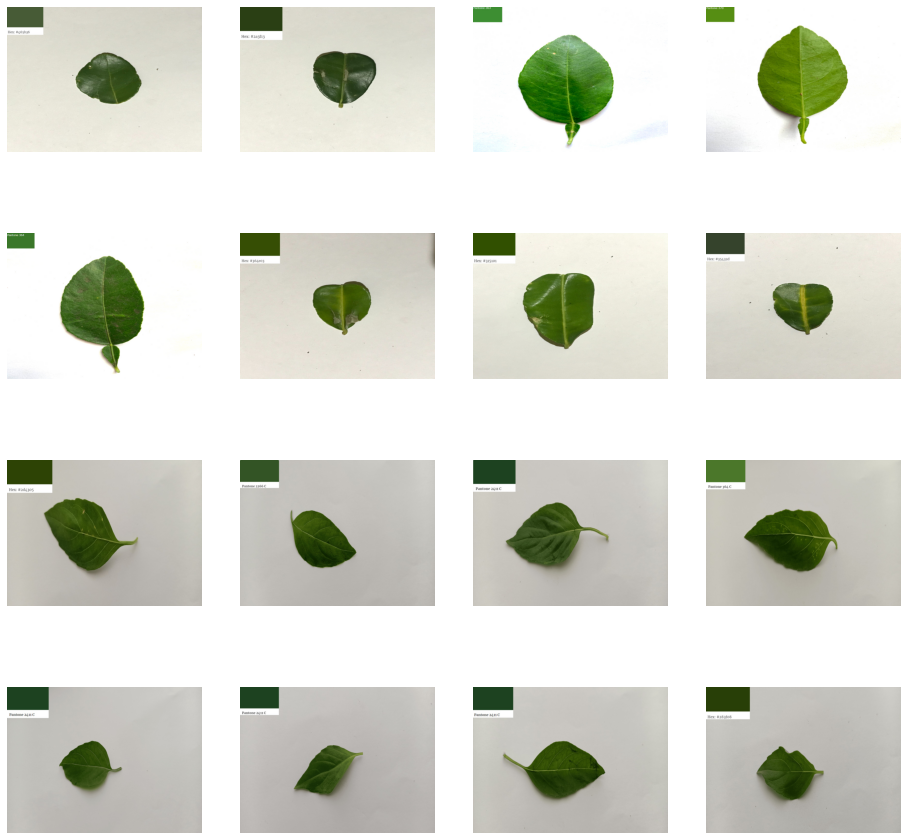

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jeruk_pix = [os.path.join(train_jeruk_nipis, fname) 
                for fname in jeruk_fnames[pic_index-8:pic_index]]
next_kemangi_pix = [os.path.join(train_kemangi, fname) 
                for fname in kemangi_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jeruk_pix+next_kemangi_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(val_directory,
                                                target_size=(150, 150),
                                                batch_size=20,
                                                class_mode='categorical',
                                                shuffle=True)

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [17]:
import keras

from keras.models import Sequential

from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten

In [27]:
model1 = Sequential()

# First Conv block
model1.add(Conv2D(16 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model1.add(Conv2D(16 , (3,3), padding = 'same' , activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

# Second Conv block
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))

# Third Conv block
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))

# Forth Conv block
model1.add(SeparableConv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))

# Fifth Conv block 
model1.add(SeparableConv2D(256, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(256, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))

# FC layer 
model1.add(Flatten())
model1.add(Dense(units = 512 , activation = 'relu'))
model1.add(Dropout(0.7))
model1.add(Dense(units = 128 , activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units = 64 , activation = 'relu'))
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(units = 2 , activation = 'softmax'))

In [28]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_24 (Separa  (None, 75, 75, 32)       688       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_25 (Separa  (None, 75, 75, 32)       1344      
 bleConv2D)                                                      
                                                      

In [31]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
history = model1.fit(
      train_generator,
      steps_per_epoch=4,
      epochs=10,
      validation_data=val_generator,
      validation_steps=1,
      verbose=1
      )

Epoch 1/10
4/4 [==============================] - 22s 5s/step - loss: 0.6944 - accuracy: 0.4286 - val_loss: 0.6939 - val_accuracy: 0.4500
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 0.6972 - accuracy: 0.4286 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.6813 - accuracy: 0.6143 - val_loss: 0.6909 - val_accuracy: 0.5500
Epoch 4/10
4/4 [==============================] - 7s 1s/step - loss: 0.6584 - accuracy: 0.7000 - val_loss: 0.6992 - val_accuracy: 0.4500
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.4081 - accuracy: 0.9429 - val_loss: 0.7357 - val_accuracy: 0.3000
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.1732 - accuracy: 0.9429 - val_loss: 0.7138 - val_accuracy: 0.4500
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.3964 - accuracy: 0.9143 - val_loss: 0.6623 - val_accuracy: 0.6500
Epoch 8/10
4/4 [========================

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, 'Training and validation loss')

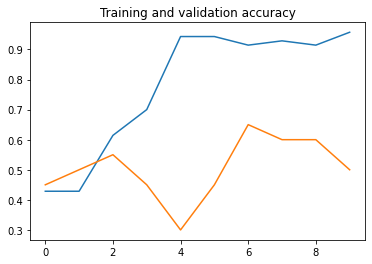

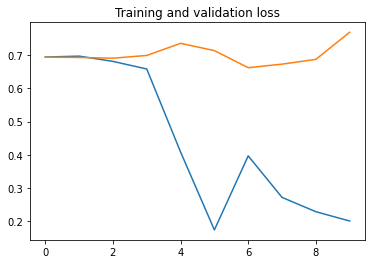

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [35]:
model1.save('/content/gdrive/MyDrive/Semester 5/Kecerdasan Buatan/models_tubes_cnn.h5')

Saving daun-jeruk.jpg to daun-jeruk.jpg
1/1 [==============================] - 0s 53ms/step
[1, 0]
Daun Kemangi : 68.78 %
Daun Jeruk : 31.22 %


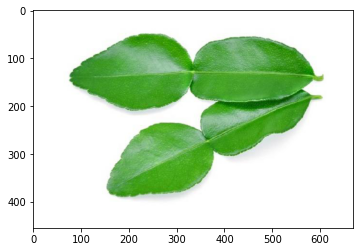

In [39]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt
from skimage.transform import resize

uploaded = files.upload()

model_path = '/content/gdrive/MyDrive/Semester 5/Kecerdasan Buatan/models_tubes_cnn.h5'
model = load_model(model_path)

for fn in uploaded.keys():
  path = fn
  new_image = plt.imread(path)
  img = plt.imshow(new_image)
  
  resize_img = resize(new_image, (150,150,3))
  prediction = model1.predict(np.array([resize_img]))
  
  list_index = [0,1]
  x = prediction
  class_names = ['Daun Jeruk', 'Daun Kemangi']
  for i in range(2):
    for j in range(2):
      if x[0][list_index[i]] > x[0][list_index[j]]:
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
  print(list_index)

  for i in range(2):
    print(class_names[list_index[i]], ':', round(prediction[0][list_index[i]] * 100,2), '%')